In [19]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

# Given change in the underlying price, time to maturity and sigma => Compute the change of a call option with given parameters (Option Greeks)
## Question 4

In [7]:
# Given initial parameters
r = 0.01
q = 0.02
sigma = 0.3
T = 1/12
s = 101
k = 100
# Changes in price, time to maturity and sigma
ds = (95 - 101)
dt = 1/365
dsigma = (0.35 - 0.3)


d1 = (np.log(s/k) + (r-q+0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
Nd1 = norm.cdf(d1)
Nd2 = norm.cdf(d2)
C = s * np.exp(-q*T) * Nd1 - np.exp(-r*T) * k * Nd2

delta = np.exp(-q*T) * Nd1
gamma = np.exp(-q*T - 0.5 * d1**2) / (s * sigma * np.sqrt(T * 2 * np.pi))
theta = - (np.exp(-q * T - 0.5 * d1**2) * s * sigma) / (2 * np.sqrt(T*2*np.pi)) \
        - r * k * np.exp(-r * T) * Nd2 + q * s * np.exp(-q * T) * Nd1
vega = np.exp(-q*T) * s * np.sqrt(T) * Nd1
print("C:", C, 'Delta:', delta, "Gamma:", gamma, "Theta:", theta, 'Vega:', vega)
print("Change in C from Delta:", delta * ds)
print("Change in C from Gamma:", 0.5 * gamma * ds ** 2)
print("Change in C from Theta:",  theta * dt)
print("Change in C from Vega:",  vega * dsigma)
print("Total change in the call price according to Delta, Gamma, Theta, Vega = ", delta * ds + 0.5 * gamma * ds ** 2 + \
                                                                                  theta * dt + vega * dsigma)

C: 3.943521760809098 Delta: 0.5581246303897199 Gamma: 0.045034028061008355 Theta: -20.069504316963872 Vega: 16.27278698264169
Change in C from Delta: -3.34874778233832
Change in C from Gamma: 0.8106125050981504
Change in C from Theta: -0.05498494333414759
Change in C from Vega: 0.8136393491320844
Total change in the call price according to Delta, Gamma, Theta, Vega =  -1.7794808714422325


## Question 5.a => As we wrote a call option, the delta will be the negative value of the delta when we buy it. (in Q.4)

In [12]:
# Given initial parameters
r = 0.01
q = 0.02
sigma = 0.3
T = 1/12
s = 101
k = 100

d1 = (np.log(s/k) + (r-q+0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
Nd1 = norm.cdf(d1)
Nd2 = norm.cdf(d2)
C = s * np.exp(-q*T) * Nd1 - np.exp(-r*T) * k * Nd2
delta = np.exp(-q*T) * Nd1
print("Delta of the call option when we wrote it (-Delta when we buy the option):", -delta)
print('So, to maintain zero Delta in our portfolio => We need to "BUY" the underlying stocks for:', delta * 200,  "stocks")

Delta of the call option when we wrote it (-Delta when we buy the option): -0.5581246303897199
So, to maintain zero Delta in our portfolio => We need to "BUY" the underlying stocks for: 111.62492607794398 stocks


# Question 5.b => As we wrote a call option, the delta will be the negative value of the delta when we buy it. (in Q.4)

In [13]:
# Given initial parameters
r = 0.01
q = 0.02
sigma = 0.3
T = 1/12
s = 95
k = 100

d1 = (np.log(s/k) + (r-q+0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
Nd1 = norm.cdf(d1)
Nd2 = norm.cdf(d2)
C = s * np.exp(-q*T) * Nd1 - np.exp(-r*T) * k * Nd2
delta = np.exp(-q*T) * Nd1
print("The new Delta:", -delta)
print('So, to maintain zero Delta in our portfolio => We need to "BUY" the underlying stocks for:', delta * 200, "stocks")

The new Delta: -0.28773564250079897
So, to maintain zero Delta in our portfolio => We need to "BUY" the underlying stocks for: 57.54712850015979 stocks


# Question 6 => sigma = 0.3, r = 0.01, q = 0.02 and our portfolio consists of...
## 1. We "wrote" a call option with k=100, T = 1/12, on 200 stocks of the underlying asset
## 2. We "purchased" 109 stocks of the underlying asset
## 3. We "borrowed" 10,000 dollars
## At s=101, the portfolio delta is approximately 0. Create the portfolio value when the underlying asset price per share ranges from 80 to 120

In [24]:
# Given initial parameters
r = 0.01
q = 0.02
sigma = 0.3
T = 1/12
k = 100

portfolio_df = {"underlying price": [], "portfolio value": [], "portfolio delta": []}

for s in range(80, 120):
    d1 = (np.log(s/k) + (r-q+0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    C = s * np.exp(-q*T) * Nd1 - np.exp(-r*T) * k * Nd2
    delta = np.exp(-q*T) * Nd1
    port_val = -10000 - C*200 + 109*s
    delta_port = - delta * 200 + 109#- Delta of the call option (Wrote option) + 109 (constant Delta for holding the stock)
    
    portfolio_df['underlying price'].append(s)
    portfolio_df['portfolio value'].append(port_val)
    portfolio_df['portfolio delta'].append(delta_port)
portfolio_df = pd.DataFrame(portfolio_df)
portfolio_df

,underlying price,portfolio value,portfolio delta
0,80,-1282.364225,107.902656
1,81,-1174.716970,107.361067
2,82,-1067.712363,106.608396
3,83,-961.589649,105.587084
4,84,-856.649105,104.232886
5,85,-753.257776,102.476931
6,86,-651.852713,100.248624
7,87,-552.940940,97.479280
8,88,-457.095489,94.106278
9,89,-364.947156,90.077453


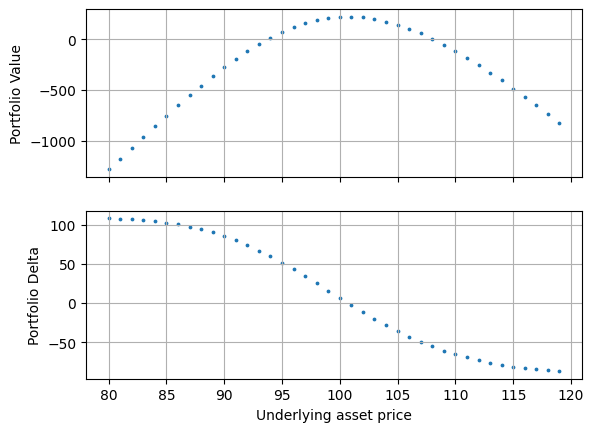

In [35]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.scatter(portfolio_df['underlying price'], portfolio_df['portfolio value'], s=3)
ax1.grid()
ax1.set_ylabel("Portfolio Value")
ax2.scatter(portfolio_df['underlying price'], portfolio_df['portfolio delta'], s=3)
ax2.grid()
ax2.set_ylabel("Portfolio Delta")
ax2.set_xlabel("Underlying asset price")
plt.show()

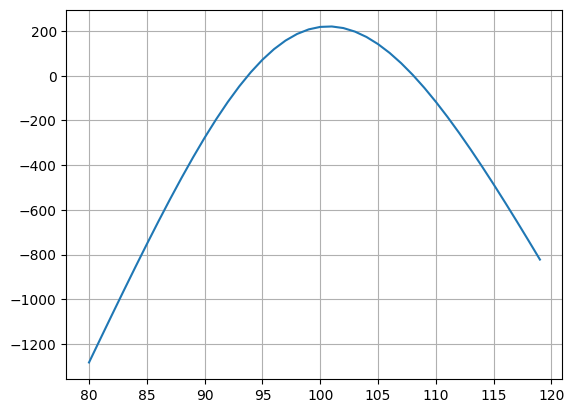

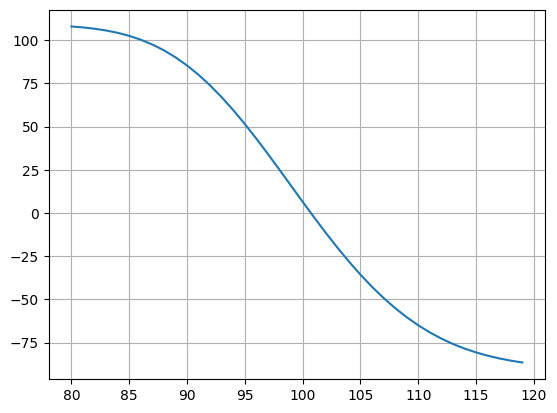

In [25]:
plt.plot()
plt.xlabel("")
plt.grid()
plt.show()
plt.plot()
plt.grid()
plt.show()